# Basic data visualization with ggplot2

Joshua French  
Invalid Date

To open this information in an interactive Colab notebook, click the
Open in Colab graphic below.

<a href="https://colab.research.google.com/github/jfrench/DataWrangleViz/blob/master/03-basic-data-viz-with-ggplot2.ipynb">
<img src="https://colab.research.google.com/assets/colab-badge.svg">
</a>

------------------------------------------------------------------------

This document is intended to help you quickly learn how to perform basic
data visualization using **ggplot2**.

An accompanying YouTube playlist that walks through this document is
available by following the link
[here](https://youtube.com/playlist?list=PLkrJrLs7xfbVbI1WHs8FfkOoFvtiI6EXd).
I have also included direct, relevant video links throughout the file
(e.g., immediately after the the relevant heading). An html version of
this document can be downloaded to your current working direction (run
`getwd()` in the Console to see where this is) by running the following
command:

In [1]:
download.file("https://raw.githubusercontent.com/jfrench/DataWrangleViz/master/03-basic-data-viz-with-ggplot2.html",
              "03-basic-data-viz-with-ggplot2.html")

## Introduction to basic data visualization with **ggplot2** (Video: [YouTube](https://youtu.be/lplgV5KT62s), [Panopto](https://ucdenver.hosted.panopto.com/Panopto/Pages/Viewer.aspx?id=f44a8a84-50de-41c6-8e9e-af0f01454961))

In this module we discuss how to perform basic data visualization.

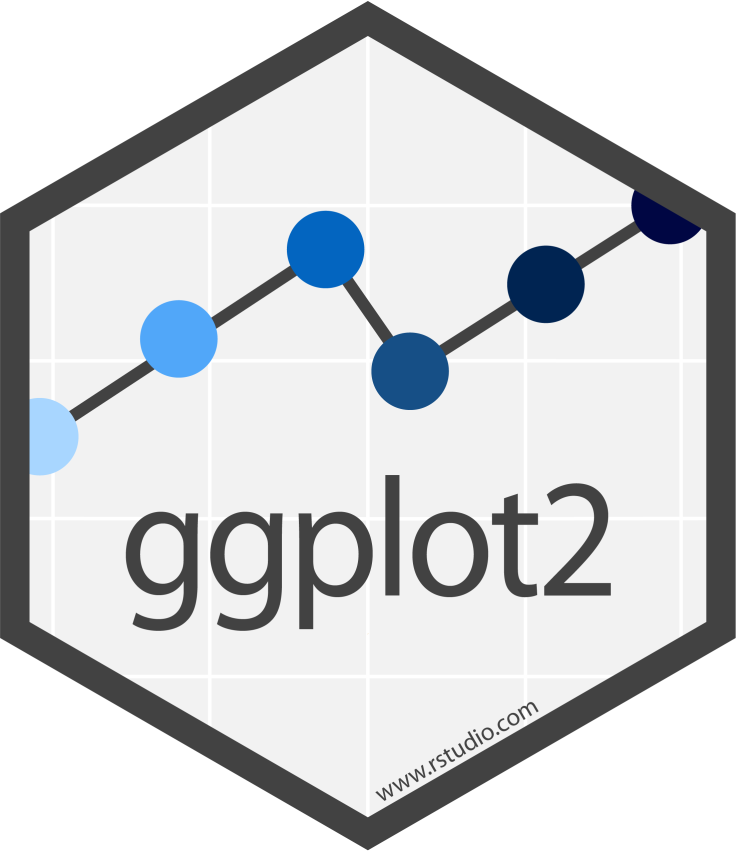

We will use **ggplot2** (Wickham 2016; Wickham et al. 2023) to construct
the graphics in this module.

**ggplot2** has become increasingly popular for producing flexible
graphics within an elegant framework.

We start by loading the **ggplot2** package.

In [3]:
library(ggplot2)

## Tips for good graphics (Video: [YouTube](https://youtu.be/cPftNY-iKCE), [Panopto](https://ucdenver.hosted.panopto.com/Panopto/Pages/Viewer.aspx?id=f2130223-3a6c-4671-aadd-af0f014c11b6))

Data graphics should be as *informative* as possible.

-   Graphics do *not* need to contain as much *information* as possible.
-   Make it as easy to understand the information you want to reveal
    about the data.
-   Simpler graphics are easier to understand and should be preferred.
-   Adding complexity to a graphic can sometimes reveal far more about
    the data than a simple graphic.
-   Make sure labels and text are large enough to easily read.
-   Make sure colors are distinguishable and colorblind friendly (e.g.,
    using the **viridis** (Garnier 2023) package).

You will have to decide what is needed in a graphic to make it as
informative as possible.

Complicated graphics may present far more information than we are able
to process, such as in the example below.

## Graphics ecosystems in R (Video: [YouTube](https://youtu.be/R12YAjSze0I), [Panopto](https://ucdenver.hosted.panopto.com/Panopto/Pages/Viewer.aspx?id=e0da966e-9758-4f86-8c16-af0f014e1e10))

There are three main graphics ecosystems in R:

1.  **base**
2.  **lattice**
3.  **ggplot2**

**base** graphics are traditional S-like graphics.

-   Run `?graphics-package` in the Console for more details.
-   These are the graphics you get by default when you use the `plot`
    function, the `hist` function, the `boxplot` function, etc.

**lattice** graphics are an implementation of Trellis graphics (Becker,
Cleveland, and Shyu 1996) for R.

-   Run `?lattice` in the Console for additional information about the
    **lattice** package.
-   The **lattice** package focuses on elegantly plotting multivariate
    data and makes it easy to distinguish different levels of `factor`
    data.
-   **lattice** and **base** graphics do not interact with each other
    (changing aspects of one graphics system has no impact on the
    other.)

**ggplot2** is a layered graphical system based on implementing the
Grammar of Graphics (Wilkinson 2005).

-   It has gained widespread popularity because of its friendliness for
    visual exploration of data by data scientists.
-   It provides an elegant approach for constructing complex plots in a
    systematic way.
-   Run `?ggplot2-package` in the Console for more information.

We demonstrate use of the three plotting ecosystems using the `penguins`
data set from the **palmerpenguins** package (Horst, Hill, and Gorman
2022), which will be discussed in more detail later. The code below
creates grouped scatter plots comparing bill length (mm) and body mass
(g) of different penguin species using each of the ecosystems.

We start by using the `data` function to load the `penguins` data from
the **palmerpenguins** package.

In [6]:
data(penguins, package = "palmerpenguins")

We now create a grouped scatter plot using **base** graphics, including
the appropriate legend.

In [7]:
plot(bill_length_mm ~ body_mass_g, data = penguins, col = penguins$species)
legend(x = "topleft", legend = levels(penguins$species),
       col = c("black", "red", "green"), pch = 1)

Next, we create a grouped scatter plot using the **lattice** package.

In [8]:
lattice::xyplot(bill_length_mm ~ body_mass_g, data = penguins, group = species,
                auto.key = TRUE)

Lastly, we create a grouped scatter plot using the **ggplot2** package.

In [9]:
ggplot2::ggplot(data = penguins) +
  ggplot2::geom_point(mapping = aes(x = body_mass_g, y = bill_length_mm,
                                    color = species, shape = species))

## Basic ingredients (Video: [YouTube](https://youtu.be/k6a3vMoBXSw), [Panopto](https://ucdenver.hosted.panopto.com/Panopto/Pages/Viewer.aspx?id=574df5a9-3294-4d6f-8f9e-af0f014e8926))

There are 4 main components needed to produce a graphic using
**ggplot2**.

1.  A data frame containing your data.
    -   Each column should be a variable and each row should be an
        observation of data.
2.  A `ggplot` object.
    -   This is initialized using the `ggplot` function.
3.  A geometric object.
    -   These are called “geoms” for short.
    -   geoms indicate the geometric object used to visualize the data.
        E.g., points, lines, polygons etc. More generally, geoms
        indicate the type of plot that is desired, e.g., histogram,
        density, or boxplot, which aren’t exactly a simple geometric
        shape.
4.  An aesthetic.
    -   An aesthetic mapping indicates what role a variable plays in the
        plot.
    -   e.g., which variable will play the “x” variable in the plot, the
        “y” variable in the plot, control the “color” of the
        observations, etc.

In *R for Data Science*, Wickham and Grolemund (2017) provide the
following template for creating graphics using **ggplot2**:

In [10]:
ggplot(data = <DATA>) + <GEOM_FUNCTION>(mapping = aes(<MAPPINGS>))

`<DATA>`, `<GEOM_FUNCTION>`, and `<MAPPINGS>` are placeholders that you
replace with the data frame, geometric object, and aesthetic mappings
you want to use in your specific plot.

An explanation of the template above:

1.  Every `ggplot` starts with a call to the `ggplot` function.
    -   You can create a blank plot by running `ggplot()` in the
        Console.
2.  Generally, you pass your data frame to the `ggplot` through the
    `data` argument.
    -   You can also pass `data` inside the `<GEOM_FUNCTION>` when you
        intend to use multiple geometric objects with different data
        sources.
3.  The `<GEOM_FUNCTION>` indicates the geometric object you want to use
    in the plot.
4.  The `<MAPPINGS>` describes the aesthetics mappings you want to use
    for this particular geometry.
    -   One of the reasons **ggplot2** is so powerful is that you can
        use different mappings for different geometric objects.
5.  The `+` symbol is used to add a layer to your graphic.
    -   If your code spans multiple lines, then you need to make sure
        all lines but the last end with the `+` operator to stack the
        layers properly.

### Some geometric objects

There are many geometric objects available in **ggplot2**. A complete
list may be (currently) found at
<https://ggplot2.tidyverse.org/reference/>. A partial list of geometric
objects that I frequently use is found below in
[Table 1](#tbl-geometry-table).

| dimensionality | geometry                                  | purpose                                                              |
|:-----------|:----------------------|:------------------------------------|
| 1d             | `geom_bar`                                | Draws a bar chart.                                                   |
| 1d             | `geom_density`                            | Draws a density plot.                                                |
| 1d             | `geom_histogram`                          | Draws a histogram.                                                   |
| 1d             | `geom_boxplot`                            | Draws a boxplot.                                                     |
| 1d             | `geom_violin`                             | Draws a violin plot.                                                 |
| 1d             | `geom_qq`                                 | Draws a quantile-quantile plot.                                      |
| 2d             | `geom_point`                              | Draws points. Used for scatter plots.                                |
| 2d             | `geom_path`, `geom_line`                  | Connects observations. Used for line plots.                          |
| 2d             | `geom_segment`                            | Draws straight lines between points.                                 |
| 2d             | `geom_curve`                              | Draws curved lines between points.                                   |
| 2d             | `geom_smooth`                             | Draws a ‘smooth’ fitted model of the data.                           |
| 2d             | `geom_density2d`                          | Draws 2d contours of density estimate for two variables.             |
| 2d             | `geom_density2d_filled`                   | Draws 2d contours of density estimate for two variables with colors. |
| 3d             | `geom_contour`                            | Draws 2d contours of 3d data.                                        |
| 3d             | `geom_contour_filled`                     | Draws 2d contours of 3d data (colored).                              |
| NA             | `geom_abline`, `geom_hline`, `geom_vline` | Draws diagonal, horizontal, and vertical lines.                      |

Table 1: Common geometries provided by **ggplot2**.

### Some aesthetic mappings

Aesthetic mappings are unique to each geometric object. Some of the most
common ones that show up in many geoms are provided below in
[Table 2](#tbl-aesthetic-table).

| aesthetic         | purpose                                            |
|:------------------|:---------------------------------------------------|
| `x`               | Controls the x-variable in the plot.               |
| `y`               | Controls the y-variable in the plot.               |
| `alpha`           | Controls the transparency of the object.           |
| `color`, `colour` | Controls the colors of the object.                 |
| `fill`            | Controls the color of the interior of an object.   |
| `group`           | Controls how the data are grouped.                 |
| `linetype`        | Controls the type of line used to draw the object. |
| `size`            | Controls the size of the drawn object.             |
| `shape`           | Controls the shape of the object.                  |

Table 2: Common aesthetics provided by **ggplot2**.

## Simple examples

### The `penguins` data (Video: [YouTube](https://youtu.be/XpsV65um6Uc), [Panopto](https://ucdenver.hosted.panopto.com/Panopto/Pages/Viewer.aspx?id=8a1b8d91-8e90-482b-8512-af0f014e88e9))

We will use the `penguins` data set in the **palmerpenguins** package
(Horst, Hill, and Gorman 2022) to illustrate some of the ways that
**ggplot2** can be used.

The `penguins` data set provides data related to various penguin species
measured in the Palmer Archipelago (Antarctica), originally provided by
Gorman, Williams, and Fraser (2014). We start by loading the data into
memory.

In [15]:
data(penguins, package = "palmerpenguins")

The data set includes `r nrow(penguins)` observations of
`r ncol(penguins)` variables. The variables are:

-   `species`: a `factor` indicating the penguin species
-   `island`: a `factor` indicating the island the penguin was observed
-   `bill_length_mm`: a `numeric` variable indicating the bill length in
    millimeters
-   `bill_depth_mm`: a `numeric` variable indicating the bill depth in
    millimeters
-   `flipper_length_mm`: an `integer` variable indicating the flipper
    length in millimeters
-   `body_mass_g`: an `integer` variable indicating the body mass in
    grams
-   `sex`: a `factor` indicating the penguin sex (`female`, `male`)
-   `year`: an integer denoting the study year the penguin was observed
    (`2007`, `2008`, or `2009`)

### Bar chart (Video: [YouTube](https://youtu.be/cBwC1SKz_gA), [Panopto](https://ucdenver.hosted.panopto.com/Panopto/Pages/Viewer.aspx?id=ef64b539-5b2c-4621-99aa-af0f014e8872))

We construct a bar chart of the `species`. A bar chart uses bars to
indicate the number of values each level of a `factor` includes.
Alternatively, the bars can indicate the relative frequency (i.e.,
proportion) of values having each level of the `factor`.

In [16]:
ggplot(penguins) + geom_bar(aes(x = species))

Relatively speaking, we can see that Adelie penguins were most
frequently observed, followed by Gentoo penguins, and then Chinstrap
penguins.

We can color the bars by `species` for visual clarity by specifying the
`fill` aesthetic.

In [17]:
ggplot(penguins) + geom_bar(aes(x = species, fill = species))

This doesn’t add any new information to the graphic but does make it
more visually appealing. We could remove the legend to simplify the
graphic, if we wanted.

In [18]:
ggplot(penguins) + geom_bar(aes(x = species, fill = species)) + theme(legend.position = "none")

### Histogram (Video: [YouTube](https://youtu.be/gFZpBO38HUg), [Panopto](https://ucdenver.hosted.panopto.com/Panopto/Pages/Viewer.aspx?id=5f323dbc-3d6c-42bd-ac62-af0f014e88aa))

A *histogram* is used to display the distribution of a continuous
`numeric` variable. The range of the variable is partitioned into
classes. The number of observations falling in each class is counted. A
histogram draws a bar for each class with height corresponding to the
number of observations in that class.

Let’s construct a histogram of bill length.

In [19]:
ggplot(penguins) + geom_histogram(aes(x = bill_length_mm))

The histogram is multimodal (i.e., has multiple prominent peaks), having
2 or 3 prominent peaks. There may be sub-populations we should
distinguish. It isn’t easy to identify sub-populations with histograms
unless the sub-populations are split into separate histograms (which we
will learn to do later with “facets”) or to make the bars
semi-transparent for the different sub-populations.

### Density plot (Video: [YouTube](https://youtu.be/UGeJ73k6BGs), [Panopto](https://ucdenver.hosted.panopto.com/Panopto/Pages/Viewer.aspx?id=1b782342-8f79-4493-a60d-af0f014e9438))

A density plot is often preferred to a histogram because it’s more
flexible, though it often provides similar information. A density plot
is essentially a smoothed version of a histogram.

A density plot is appropriate for displaying the distribution of a
continuous `numeric` variable and indicates the values for which the
data is more “dense”. More specifically, density plots indicate the
values of data you are most likely to observe. A higher density region
means you are more likely to observe data with values in that region.
There is a statistical definition we will not go into.

A simple density plot is shown below. We can’t learn a lot because of
the sub-populations previously mentioned.

In [20]:
ggplot(penguins) + geom_density(aes(x = bill_length_mm))

There are at least two modes in the `bill_length_mm` density plot.

Let’s create separate densities for the different penguin species by
specifying the `color` aesthetic to *scale* different colors to the
different levels of `species`.

In [21]:
ggplot(penguins) + geom_density(aes(x = bill_length_mm, color = species))

There are clear differences in the bill length of Adelie, Chinstrap, and
Gentoo penguins. The bill length for the Adelie penguins is about 35 mm
and closer to 47 mm for the Gentoo penguins. The Chinstrap penguins have
the greatest bill length, in general. It appears the Chinstrap penguins
may have a further sub-population.

A weakness of the previous graphic is that the legend distinguishing the
different `species` is a bit subtle. The colored line around the border
may not be easy to distinguish for everyone. We could use a different
`linetype` for each species or we could use different `color` and
`linetype` for each species. We consider the different results below.

In [22]:
ggplot(penguins) + geom_density(aes(x = bill_length_mm, linetype = species))

In [23]:
ggplot(penguins) + geom_density(aes(x = bill_length_mm, col = species, linetype = species))

An even better option is to `fill` the densities for each species with
different colors. However, the density curves will overlap, masking some
of the information.

In [24]:
ggplot(penguins) + geom_density(aes(x = bill_length_mm, fill = species))

To address the masking issue, we can control the transparency of the
colors using the `alpha` aesthetic. This value, between 0 and 1,
controls how transparent the objects are. `0` means transparent, `1`
means completely opaque. We will set `alpha = 0.3`. Notice that we
specify this OUTSIDE the aesthetic mapping since we are controlling the
aesthetic manually instead of having **ggplot2** *scale* the provided
variable.

In [25]:
ggplot(penguins) + geom_density(aes(x = bill_length_mm, fill = species), alpha = 0.3)

### Scaling

When a variable is mapped to an aesthetic, **ggplot2** will assign a
unique value to each unique level of the variable. This process is known
as *scaling*.

Scaling is often not very exciting, but it can be important when
customizing the look of a `ggplot`.

When a variable is mapped to a non `x` or `y` aesthetic, **ggplot2**
will automatically add a legend to indicate how the variable was scaled.

### Boxplots (Video: [YouTube](https://youtu.be/EZjkg_hsh-w), [Panopto](https://ucdenver.hosted.panopto.com/Panopto/Pages/Viewer.aspx?id=3f6365cb-94eb-4ef9-8271-af0f014e96a3))

A boxplot is a robust display of information for a continuous `numeric`
variable. Boxplots are robust because they rely on robust statistics not
easily affected by outliers.

In general, a boxplot:

-   Draws a box extending from Q1 (the 0.25 quantile) to Q3 (the 0.75
    quantile) of the data.
-   A line between Q1 and Q3 indicates the median (the 0.5 quantile) of
    the data.
-   A “whisker” extends from Q1 to the smallest observation that is not
    an outlier.
-   A “whisker” extends from Q3 to the largest observation that is not
    an outlier.
-   A star or circle is used to indicate that an observation is an
    outlier.
    -   An **outlier** is typically defined as an observation smaller
        than Q1 - 1.5 (Q3 - Q1) or larger than Q3 + 1.5 (Q3 - Q1).

Parallel boxplots are an effective tool for comparing differences
between a variable across multiple levels of a `factor` variable.

Consider parallel boxplots of bill length distinguished by `species`.

In [26]:
ggplot(penguins) + geom_boxplot(aes(y = bill_length_mm, x = species))

We can see that the typical responses for the Adelie penguins tend to be
lower than for the Chinstrap and Gentoo penguins. The Chinstrap penguins
tend to have slightly longer beaks that the Gentoo penguins. All three
penguins species seem to have similar variability (i.e., the spread of
the data is similar).

A weakness of boxplots is that they throw away a lot of information.
e.g., We don’t see the two sub-populations in the Chinstrap penguins
that we noticed earlier when looking at density plots.

Adding a `fill` color to the boxplots (while removing the legend) might
be a more visually appealing graphic.

In [27]:
ggplot(penguins) + geom_boxplot(aes(y = bill_length_mm, x = species, fill = species)) +
  theme(legend.position = "none")

### Violin plots (Video: [YouTube](https://youtu.be/QbVWcjxYgHY), [Panopto](https://ucdenver.hosted.panopto.com/Panopto/Pages/Viewer.aspx?id=27b50ff6-2aaa-48ef-85ac-af0f014ea88d))

A violin plot blends a boxplot and a density plot. A violin plot unites
a density with its mirror image and then displays the unified object
like a boxplot.

We construct violin plots of bill length for each penguin `species`.

In [28]:
ggplot(penguins) + geom_violin(aes(x = species, y = bill_length_mm))

While the Adelie bill lengths are approximately symmetric and unimodal,
both the Chinstrap and Gentoo bill lengths are bimodal and asymmetric.

### Scatter plots (Video: [YouTube](https://youtu.be/DjORoUDMLD4), [Panopto](https://ucdenver.hosted.panopto.com/Panopto/Pages/Viewer.aspx?id=8b15f3a4-aaa3-4a73-aebd-af0f014eab0a))

A scatter plot draws symbols at the locations of (x, y) positions based
on two `numeric` variables. In general, we use scatter plots to learn
information about the *association* between the two variables.

-   A positive association is present when both variables tend to
    increase together.
-   A negative association is present when one variable tends to
    decrease when the other increases.
-   A linear association is present when the relationship between the
    two variables is a straight line.
-   A nonlinear association is present when the relationship between the
    two variables is a curve.
-   It is possible that no clear association is present in the data.

Let’s consider a scatter plot of `bill_length_mm` versus `body_mass_g`.

In [29]:
ggplot(penguins) + geom_point(aes(x = body_mass_g, y = bill_length_mm))

We see a positive association in the graphic above. As `body_mass_g`
increases, `bill_length_mm` also tends to increase. However, it appears
that there may be some observations in the upper left part of the graph
that do not match the overall linear trend.

This could mean:

1.  The data are *noisy*, which simply means the patterns aren’t as
    strong and clear as we would like.
2.  There is a third variable that not accounted for in our plot but
    that has a relationship with the other two variables.
    -   When we are not accounting for this variable, it is called a
        *lurking variable*.
    -   When we account for a lurking variable in our analysis, it
        becomes a *confounding variable*.
    -   We are defining lurking and confounding variables in a general
        sense and not with statistical rigor.

Let’s consider an analysis of `body_mass_g` and `bill_length_mm` that
accounts for `species`. Specifically, we will use the `color` aesthetic
so that each penguin species is shown in a different color.

In [30]:
ggplot(penguins) + geom_point(aes(x = body_mass_g, y = bill_length_mm, color = species))

Accounting for `species` in the analysis shows clear patterns for the
three penguin species. Chinstrap penguins tend to have smaller body mass
but longer bill lengths. Adelie penguins have smaller body mass and bill
lengths. Gentoo penguins tend to have larger body mass and bill lengths
than the other two species.

As previously mentioned, we want our plots to be as clear as possible.
Some individuals have difficulty interpreting colors in graphics. We can
add another distinguishing characteristic for the different species. In
this case, we will change the `shape` of the plotted points for each
species. This provides another aid for correctly interpreting the
graphic.

In [31]:
ggplot(penguins) +
  geom_point(aes(x = body_mass_g, y = bill_length_mm, color = species, shape = species))

### Adding smooths (Video: [YouTube](https://youtu.be/P2_qYBV1Byc), [Panopto](https://ucdenver.hosted.panopto.com/Panopto/Pages/Viewer.aspx?id=dfeca0cc-4591-4306-9e85-af0f014eb95b))

A smooth in **ggplot2** is a model that that attempts to estimate the
average relationship between a response variable (typically the `y`
variable) and one or more predictor variables (typically the `x` and
possibly other variables)

Adding a “smooth” to a plot can make relationships between variables
even clearer. There are many different smoothing methods.

A smoothing layer can be added to a plot using `geom_smooth`. Many
methods can be used for the smooth. **ggplot2** takes the methods `lm`
(linear model), `glm` (generalized linear model), `gam` (generalized
additive model), `loess` (local fitting), or a function (e.g.,
`MASS::rlm` for a robust linear model). If you don’t know what these
are, do not add them to your plot because they won’t help you to explain
the data.

A simple linear regression model fits the straight line that minimizes
the squared deviations between the y values and the estimated line. We
add simple linear regression line to the scatter plot by adding a
`geom_smooth` layer.

In [32]:
ggplot(penguins) +
  geom_point(aes(x = body_mass_g, y = bill_length_mm, color = species, shape = species)) +
  geom_smooth(aes(x = body_mass_g, y = bill_length_mm), method = "lm")

This only adds a single line across all groups, which clearly doesn’t
explain the relationship when accounting for `species`. To add a
separate line for each `species`, we need to include that in the
aesthetic mapping for `geom_smooth`. If we scale the `species` variable
using the `color` aesthetic, then a simple linear regression line will
be estimated for each species in the color that matches the points for
that `species`.

In [33]:
ggplot(penguins) +
  geom_point(aes(x = body_mass_g, y = bill_length_mm, color = species, shape = species)) +
  geom_smooth(aes(x = body_mass_g, y = bill_length_mm, color = species), method = "lm")

### Using common aesthetics across geometries (Video: [YouTube](https://youtu.be/oFWHATa7AQw), [Panopto](https://ucdenver.hosted.panopto.com/Panopto/Pages/Viewer.aspx?id=4065f746-5cf2-45ef-a5d8-af0f014ebcc7))

Notice that we had to specify the aesthetic mappings in each geom. This
seems redundant.

If you specify an aesthetic mapping in a geom, then the aesthetic
mapping is *local* and only applies to that particular geom. If you want
to specify a *global* aesthetic mapping that applies across all geoms,
then you can specify the `mapping` in the `ggplot` function.

Here is a simpler version of the previous plot.

In [34]:
ggplot(data  = penguins, mapping = aes(x = body_mass_g, y = bill_length_mm, color = species)) +
  geom_point(aes(shape = species)) +
  geom_smooth(method = "lm")

## Customizing plots (Video: [YouTube](https://youtu.be/Pe5r881J4p8), [Panopto](https://ucdenver.hosted.panopto.com/Panopto/Pages/Viewer.aspx?id=0d6a421f-6f27-43bd-bdca-af0f014ebe3d))

Unsurprisingly, the graphics produced by **ggplot2** can be greatly
customized. We consider some of the basic customizations below.

### Assigning a plot

One of the strengths of **ggplot2** is that you can easily build a plot
layer by layer. In this case, it is useful to assign the current plot a
name that can then be added to later.

Note: When you assign a `ggplot` a name, it will NOT be displayed. This
is consistent with the behavior of R when objects are assigned a name.
You have to then print the object using the `print` function or by
simply running the object name in the Console. Let’s assign the name
`ggp` to the basic penguin scatter plot displaying bill length versus
body mass, using colors and shapes to distinguish between different
species.

In [35]:
ggp <- ggplot(data  = penguins,
              mapping = aes(x = body_mass_g, y = bill_length_mm, color = species)) +
  geom_point(aes(shape = species))
ggp

We’ll customize this plot below.

### Axis labels and titles

The x-axis labels, y-axis labels, and title of a plot are controlled
using the `xlab`, `ylab`, and `ggtitle` functions, respectively. Let’s
customize the penguin scatter plot previously discussed. We’ll update
the `ggp` object to include our customizations and then print the
result.

In [36]:
ggp <- ggp + xlab("body mass (g)") + ylab("bill length (mm)") +
  ggtitle("Penguin body characteristics")
ggp

### Axis limits

The x-axis and y-axis limits are controlled using the `xlim` and `ylim`
functions. Each function takes the lower and upper limit you want to
set, e.g., `xlim(0, 100)`. Let’s change the axes for the penguin scatter
plot previously discussed. There’s nothing wrong with the previous
limits, but we’ll extend them a bit for demonstration.

In [37]:
ggp + xlim(2000, 7000) + ylim(0, 80)

### Manual aesthetics

Aesthetics can be set manually in a geom by specifying the aesthetic
directly in the geom but outside the `aes` function. Let’s change the
shape of the points for a scatter plot, increase the size of the points,
and manually change the color of the points.

In [38]:
ggplot(data  = penguins) +
  geom_point(aes(x = body_mass_g, y = bill_length_mm), shape = 15, size = 5, color = "blue")

### Scale customization

*Scaling* is the name of the process used by **ggplot2** to map a
variable to a unique value. This is particularly important for `factor`
variables. For example, color scaling is the process by which the the
`color` aesthetic is mapped to particular colors. These can be
customized using the various `scale_*` functions, where the “\*” is a
placeholder for the rest of the function name.

Let’s manually set the color scaling using the `scale_color_manual`
function. The colors provided below come from the *Dark2* color palette
of the *qualitative* type provided by the ColorBrewer website
(<https://colorbrewer2.org/>), which provides color advice. It’s
particularly great for identifying colorblind-friendly color palettes.

In [39]:
ggp + scale_color_manual(values = c("#1b9e77", "#d95f02", "#7570b3"))

Alternatively, we could have used `scale_color_brewer` function instead,
which automatically includes the color palettes desigend by Color
Brewer. Run `?scale_color_brewer` for more details.

In [40]:
ggp + scale_color_brewer(type = "seq", palette = "Dark2")

Scalings can be customized in many ways, but it quickly becomes
complicated, so we don’t discuss them further.

### Legend customization

The legend can be customized in many ways. To move the location of the
legend, you can specify the `legend.position` argument of the `theme`
function.

In [41]:
ggp + theme(legend.position = "bottom")

You can customize legend size, background, names, colors, etc. For
specific implementation details, it is probably best to do a web search.

### Themes

A theme is a customized style that changes the overall appearance of
your graphic. **ggplot2** provides a number of built-in themes. Some of
the built-in themes include:

-   `theme_gray`: the default theme. Gray background and white grid
    lines.
-   `theme_bw`: white background and gray grid lines.
-   `theme_classic`: white background and no grid lines.
-   `theme_minimal`: white background, no grid lines, no axis lines.
-   `theme_light`: white background, gray grid lines, and a box around
    the plotting region.
-   `theme_dark`: essentially a “dark” opposite to `theme_light`.

We will use the **patchwork** package (Pedersen 2023) to easily combine
several plots into a single graphic. The **patchwork** package uses `()`
to group a set of plots, `|` to separate plots horizontally, and `/` to
stack sets of plots vertically.

We first load the **patchwork** package.

In [42]:
library(patchwork)

We assign the different plots and themes different names.

In [43]:
ggp_gray <- ggp + theme_gray() + ggtitle("theme_gray")
ggp_bw <- ggp + theme_bw() + ggtitle("theme_bw")
ggp_classic <- ggp + theme_classic() + ggtitle("theme_classic")
ggp_minimal <- ggp + theme_minimal() + ggtitle("theme_minimal")
ggp_light <- ggp + theme_light() + ggtitle("theme_light")
ggp_dark <- ggp + theme_dark() + ggtitle("theme_dark")

Now we combine the plots using **patchwork**.

In [44]:
(ggp_gray | ggp_bw) / (ggp_classic | ggp_minimal) / (ggp_light | ggp_dark)

These themes can be customized further by changing the appropriate
aspects of the plots. We leave the user to use web searches for the
desired customizations.

## Other components of a `ggplot`

### Facetting (Video: [YouTube](https://youtu.be/6NGrEJ7phTA), [Panopto](https://ucdenver.hosted.panopto.com/Panopto/Pages/Viewer.aspx?id=8b06b243-0bde-400d-b8d2-af0f0151c6a9))

*Facetting* a data set creates separate plotting panels for each level
of one or more discrete variables. Facetting is useful for examining
patterns for combinations of levels for one or more discrete variables.
Technically, facetting can be performed for `numeric` variables with a
relatively small number of unique values, but for practical reasons,
facetting is most appropriate for `factor` variables.

There are two functions for creating facetted graphics in **ggplot2**:

-   `facet_wrap` facets the plots based on a single `factor` variable.
    The panels are wrapped around the plotting window.
-   `facet_grid` forms a matrix of panels based on row and column
    facetting variables.

In the plot below, we facet scatter plots of `bill_length_mm` versus
`body_mass_g` by `species`.

In [45]:
ggplot(penguins) + geom_point(aes(x = body_mass_g, y = bill_length_mm)) + facet_wrap(~species)

By default, the same x and y axes are used in all panels. This is
standard because it facilitates direct comparisons across panels. This
can be customized using the `scales` argument of the `facet_*`
functions. The allowable `scales` argument values are:

-   `fixed`: same x and y axes for all panels. The default.
-   `free`: individual x and y axes for each panel
-   `free_x`: individual x axes for each panel, common y axis
-   `free_y`: individual y axes for each panel, common x axis

We now consider use the `facet_grid` function to facet by two `factor`
variables, `species` and `sex`. Prior to plotting, we remove the
observations with `NA` for the `sex` variable.

In [46]:
ggplot(subset(penguins, !is.na(sex))) +
  geom_point(aes(x = body_mass_g, y = bill_length_mm)) +
  facet_grid(species ~ sex)

There appears to be differences in the sizes of the male and female
penguins, bit it is difficult to compare the patterns across panels. It
may be more useful to facet by `species` but distinguish by `sex` in a
single panel.

In [47]:
ggplot(subset(penguins, !is.na(sex))) +
  geom_point(aes(x = body_mass_g, y = bill_length_mm, color = sex, shape = sex)) +
  facet_wrap(~ species)

It is clear now that across species, the males tend to have greater body
mass and bill length in comparison to the females.

### Statistical transformations (Video: [YouTube](https://youtu.be/ia7CZEBgoKc), [Panopto](https://ucdenver.hosted.panopto.com/Panopto/Pages/Viewer.aspx?id=d8423414-cb23-4bf4-9875-af0f0151c66f))

*Statistical transformations* are the process that **ggplot2** uses to
summarize the data before plotting. By default, every geom uses a
default `stat` argument that summarizes the data before plotting.
Perhaps surprisingly, every `stat_*` has a default `geom` argument to
specify how the summarized data should be plotted.

In general, you can simply learn to use the geom that summarizes and
plots the data to your liking. Depending on the data you have, sometimes
you may want to specify a different `stat` argument. In general, custom
`stat` arguments are beyond the scope of this tutorial.

However, we do consider a simple example involving bar charts.

By default, `geom_bar` uses `stat_count` to count the number of values
having each level of a `factor` variable and then plots the height of
each bar above the names of the `factor` levels.

In [48]:
ggplot(penguins) + geom_bar(aes(x = sex))

However, let’s suppose our data frame already has counts for the number
of values in each level. In that case, we must change the `stat`
argument for `geom_bar` to `"identity"` (for `stat_identity`).

Let’s create a data frame with the counts for the `sex` variable for the
`penguins` data. We include `NA` values in our counts.

In [49]:
# count values with each level
penguins_count <- as.data.frame(table(penguins$sex, useNA = "ifany"))
# rename variales
names(penguins_count) <- c("sex", "count")
# print data frame
penguins_count

We now create a bar plot using the counts stored in the `penguins_count`
data frame, making sure to set the `stat` argument of `geom_bar` to
`"identity"`.

In [50]:
ggplot(penguins_count) + geom_bar(aes(x = sex, y = count), stat = "identity")

### Position

The `position` argument of a geom describes the positions of the objects
produced. Most of the time this is pretty straightforward, but there can
be times when it is helpful (or unhelpful) to customize `position`.

#### Jittering data (Video: [YouTube](https://youtu.be/Rv3oNQQIKIw), [Panopto](https://ucdenver.hosted.panopto.com/Panopto/Pages/Viewer.aspx?id=fb9f1eb4-a86a-46b0-b8c5-af0f0151c63c))

Sometimes, data values/information overlap, which makes interpreting the
plot more difficult. In that case, it can be useful to “jitter” the data
so that the values/information are not overlapping. The data are not
technically as accurate, but the large-scale distribution of the data is
easier to interpret.

The `Galton` data set in the **HistData** package (Friendly 2021)
includes 928 observations of 2 variables. The variables are:

-   `parent`: a `numeric` variable indicating the average height of a
    child’s mother and father (in).
-   `child`: a `numeric` variable indicating the height of each child
    (in).

The data are rounded to the nearest 0.1 inch. Additional information can
be found by running `?HistData::Galton` in the Console.

Unfortunately, the rounding of the data values leads to overplotting
(many points being stacked on top of each other). Below, we load the
`Galton` data and create a scatter plot of child height versus parents’
average height.

In [51]:
data(Galton, package = "HistData")
ggplot(Galton) + geom_point(aes(x = parent, y = child))

There is a lot of overplotting in this graphic. We use the `position`
argument to `jitter` the data to make the overall distribution clearer.
There’s not a lot of information gain from jittering the data in this
particular example, but we can see that there are more observations in
the central part of the plot.

In [52]:
ggplot(Galton) + geom_point(aes(x = parent, y = child), position = "jitter")

#### Stacking, filling, and dodging (Video: [YouTube](https://youtu.be/q1tTRuReq7w), [Panopto](https://ucdenver.hosted.panopto.com/Panopto/Pages/Viewer.aspx?id=6238c99f-525d-4589-853d-af0f0151c6dc))

I was tempted to title this section, “plots that make me emotional”
because several of the graphics below cause me to go through a range of
mostly unpleasant emotions when I view them.

In this section, we’ll see how `stack`, `fill`, and `dodge` can be used
in the `position` argument. While these examples demonstrate their use,
some of the results are an absolute mess. I will conclude with
alternative recommendations.

When creating a bar chart, a `factor` variable is mapped to the `x`
aesthetic. If a different `factor` variable is mapped to the `fill`
aesthetic, then **ggplot2** will `stack` the bars for the `fill`
variable inside the bars for the `x` variable. Consider the bar chart
below in which we “stack” penguin `sex` within the bars for the
different species.

In [53]:
ggplot(penguins) +  geom_bar(aes(x = species, fill = sex))

If you compare this bar chart with the original one that doesn’t fill by
`sex`, the bar height is identical. However, within each species, we
`fill` the bars to show the number of penguins with each level of `sex`.

This plot is difficult to interpret. It takes a lot of mental energy to
compute approximately how many male, female, and `NA` observations there
are within each species. While the updated bar chart compactly provides
a lot of information, it doesn’t facilitate easy interpretation.

If we wanted to compare the proportion of male, female, and `NA`
penguins in each species, we can change the `position` argument to
`fill`. In that case, the bars within each level of `species` will be
scaled to one, directly facilitating comparisons between the colors
within each bar.

In [54]:
ggplot(penguins) +  geom_bar(aes(x = species, fill = sex), position = "fill")

I still consider this a poor display of the data, but we can see that
the proportion of males is close to 50% for all species.

Lastly, if we don’t want to `stack` or `fill` the bars, we can have them
`dodge` each other. In that case, the overlapping bars will “dodge” each
other and sit next to each other in the plot.

In [55]:
ggplot(penguins) +  geom_bar(aes(x = species, fill = sex), position = "dodge")

If you want to compare the number of penguins with each `sex` within
each `species`, this graphic isn’t too bad. However, the bars
representing male penguins (or alternatively, female penguins) are
spread out and more difficult to compare directly because of the other
bars between them.

While the above charts provide a fair amount of information compactly,
to facilitate ease of interpretation we should construct our graphics to
highlight the characteristic of importance.

E.g., If we want to compare the counts of each penguin `species` within
each `sex`, it would be better to facet the data by `sex` and display
the count of each species.

In [56]:
ggplot(penguins) +  geom_bar(aes(x = species, fill = species)) + facet_wrap(~ sex)

Alternatively, if we want to highlight the composition of `sex` within
each `species`, then I recommend creating a bar chart of `sex` while
facetting by `species`. This plot is quite similar to the “dodge” plot
above, but provides further distinction between the charts for each
species.

In [57]:
ggplot(penguins) +  geom_bar(aes(x = sex, fill = sex)) + facet_wrap(~ species)

The examples above are shown for factor variables with only three levels
of each factor, and you may think I’m overreacting (and perhaps I am).
However, the issues mentioned above are magnified when our `factor`
variables have many levels. To illustrate this point, I present “stack”
and “dodge” bar charts of the `diamonds` data in the **ggplot2**
package, in which we compare the `cut` and `clarity` of diamonds. Each
variable has at least 5 levels. The large number of levels for the `cut`
and `clarity` variables make it difficult to quickly interpret the
relationship between the two variables. The **patchwork** package is
used to combine the two charts into a single graphic. (We also rotate
the x-axis labels 90 degrees so they don’t overlap each other). How easy
is it for you to interpret the information below?

In [58]:
ggp_stack <- ggplot(diamonds) + 
  geom_bar(aes(x = cut, fill = clarity)) +
  ggtitle("stack") +
  theme(axis.text.x = element_text(angle = 90, hjust = 1))
ggp_dodge <- ggplot(diamonds) +
  geom_bar(aes(x = cut, fill = clarity), position = "dodge") +
  ggtitle("dodge") +
  theme(axis.text.x = element_text(angle = 90, hjust = 1))
ggp_stack + ggp_dodge

### Coordinate Systems (Video: [YouTube](https://youtu.be/naQPwZxkb2M), [Panopto](https://ucdenver.hosted.panopto.com/Panopto/Pages/Viewer.aspx?id=6e799963-500c-4fe6-9fa1-af0f0151d1ee))

A coordinate system is used to define the position of coordinates
relative to one another.

By default, **ggplot2** uses the Cartesian coordinate system
(<https://en.wikipedia.org/wiki/Cartesian_coordinate_system>). The
Cartesian coordinate system treats coordinates as points on a flat
plane, which is how humans tend to think about coordinates in
relationship to one another.

Other coordinate systems are commonly used for maps because the points
are actually on an ellipsoidal object (the Earth!), which complicates
their relationship.

We do not discuss coordinate systems in detail here. The only coordinate
system I want to mention is the “flipped” coordinate system
(`coord_flip`), which flips the x and y axes. This is useful for
rotating objects in a plot. Consider the parallel boxplots examples
below.

In [59]:
ggplot(penguins) + geom_boxplot(aes(x = species, y = body_mass_g, fill = species))
ggplot(penguins) + geom_boxplot(aes(x = species, y = body_mass_g, fill = species)) + coord_flip()

## References

Becker, R. A., W. S. Cleveland, and M. J. Shyu. 1996. “The Visual Design
and Control of Trellis Display.” *Journal of Computational and Graphical
Statistics* 5 (2): 123–55.

Friendly, Michael. 2021. *HistData: Data Sets from the History of
Statistics and Data Visualization*.
<https://CRAN.R-project.org/package=HistData>.

Garnier, Simon. 2023. *Viridis: Colorblind-Friendly Color Maps for r*.
<https://CRAN.R-project.org/package=viridis>.

Gorman, Kristen B., Tony D. Williams, and William R. Fraser. 2014.
“Ecological Sexual Dimorphism and Environmental Variability Within a
Community of Antarctic Penguins (Genus Pygoscelis).” *PLOS ONE* 9 (3):
1–14. <https://doi.org/10.1371/journal.pone.0090081>.

Horst, Allison, Alison Hill, and Kristen Gorman. 2022. *Palmerpenguins:
Palmer Archipelago (Antarctica) Penguin Data*.
<https://CRAN.R-project.org/package=palmerpenguins>.

Pedersen, Thomas Lin. 2023. *Patchwork: The Composer of Plots*.
<https://CRAN.R-project.org/package=patchwork>.

Wickham, Hadley. 2016. *Ggplot2: Elegant Graphics for Data Analysis*.
Springer-Verlag New York. <https://ggplot2.tidyverse.org>.

Wickham, Hadley, Winston Chang, Lionel Henry, Thomas Lin Pedersen,
Kohske Takahashi, Claus Wilke, Kara Woo, Hiroaki Yutani, and Dewey
Dunnington. 2023. *Ggplot2: Create Elegant Data Visualisations Using the
Grammar of Graphics*. <https://CRAN.R-project.org/package=ggplot2>.

Wickham, Hadley, and Garrett Grolemund. 2017. *R for Data Science*.
O’Reilly Media, Inc.

Wilkinson, Leland. 2005. *The Grammar of Graphics (Statistics and
Computing)*. Berlin, Heidelberg: Springer-Verlag.